# N-grams
---
An N-Gram is a connected string of N items from a sample of text or speech. The N-Gram could be comprised of large blocks of words, or smaller sets of syllables. N-Grams are used as the basis for functioning N-Gram models, which are instrumental in natural language processing as a way of predicting upcoming text or speech.
![N-gram example](./images/n-gram.jpg)

## Supporting articles
- [What are n-grams?](https://www.educative.io/answers/what-are-n-grams) 
- [Implement N-Grams using Python NLTK – A Step-By-Step Guide](https://www.askpython.com/python/examples/n-grams-python-nltk)

In [75]:
import pandas as pd
from nltk import ngrams, everygrams
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
corpora = pd.read_csv('./Dataset/model_ready_combined.csv')

In [3]:
corpora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157913 entries, 0 to 157912
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   clean training  157912 non-null  object
 1   label           157913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [15]:
corpora.tail()

,clean training,label
157908,we should forcibly remove all the foreigners f...,2
157909,we should forcibly remove all the immigrants f...,2
157910,dalits be unworthy of the gods love,2
157911,dalits be worthless,2
157912,dalits be deserve to be treat as lowlife,2


In [46]:
corpora.isna().sum()

clean training    1
label             0
dtype: int64

In [35]:
data = corpora.dropna()
x = data.drop('label', axis=1)
y = data['label']
data.head()

In [48]:
data.isna().sum()

clean training    0
label             0
dtype: int64

In [80]:
#following function returns the n-gram tokens and labels from the corpora
def get_tokens_ngram(test_size=0.2, ngram=1):
    tokenizer = TweetTokenizer()
    train_tokens = []
    data_train, data_test, train_labels, test_labels = train_test_split(x, y ,test_size=test_size, shuffle=True, random_state=42)
    print(f'Samples in data_train: {len(data_train)},\nSamples in data_test: {len(data_test)},\nSamples in label_train: {len(label_train)},\nSamples in label_test: {len(label_test)}')
    for idx in range(data_train.shape[0]):
        words = tokenizer.tokenize(data_train.iloc[idx]['clean training'])
        if ngram != 1:
            ngram_words = ngrams(words, ngram)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            train_tokens.append(tokens_rec)
        else:
            train_tokens.append(words)
    test_tokens = []
    for idx in range(data_test.shape[0]):
        words = tokenizer.tokenize(data_test.iloc[idx]['clean training'])
        if ngram != 1:
            ngram_words = ngrams(words, ngram)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            test_tokens.append(tokens_rec)
        else:
            test_tokens.append(words)
    return train_tokens, train_labels, test_tokens, test_labels

#following function returns the every-gram tokens and labels from the corpora
def get_tokens_every_gram(test_size=0.2, min_length=1, max_length=5):
    tokenizer = TweetTokenizer()
    train_tokens = []
    data_train, data_test, train_labels, test_labels = train_test_split(x, y ,test_size=test_size, shuffle=True, random_state=42)
    print(f'Samples in data_train: {len(data_train)},\nSamples in data_test: {len(data_test)},\nSamples in label_train: {len(label_train)},\nSamples in label_test: {len(label_test)}')
    for idx in range(data_train.shape[0]):
        words = tokenizer.tokenize(data_train.iloc[idx]['clean training'])
        if min_length != 1:
            ngram_words = everygrams(words, min_len=min_length, max_len=max_length)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            train_tokens.append(tokens_rec)
        else:
            train_tokens.append(words)
    test_tokens = []
    for idx in range(data_test.shape[0]):
        words = tokenizer.tokenize(data_test.iloc[idx]['clean training'])
        if min_length != 1:
            ngram_words = everygrams(words, min_len=min_length, max_len=max_length)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            test_tokens.append(tokens_rec)
        else:
            test_tokens.append(words)
    return train_tokens, train_labels, test_tokens, test_labels

In [81]:
data_train, label_train, data_test, label_test = get_tokens_ngram()
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 126329,
Samples in data_test: 31583,
Samples in label_train: 126329,
Samples in label_test: 31583
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      9842
           1       0.73      0.81      0.77     10322
           2       0.63      0.78      0.70     11419

    accuracy                           0.72     31583
   macro avg       0.76      0.71      0.72     31583
weighted avg       0.75      0.72      0.72     31583



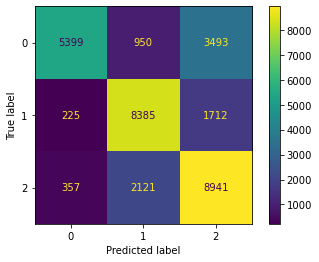

In [82]:
conf_mat = confusion_matrix(label_test, predictions, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=pipeline.classes_)
display.plot();

## Same Pipeline with bi-Gram tokens
This pipeline consists of:
- **Vectorizer** which converts text or list of tokens list to a token count matrix
- **Term Frequency Inverse Document Frequency Transformer** Which weighs each count if its a deciding term in a document if its appeared in higher count or its a common term in general which appears in each document of corpora with a higher count.
- **Naive Bayes Classifier** There are multiple implementations of Naive Bayes classifier in scikit-learn library we have chosen MultinomialNB for our task which is the chosen and recommended tool in text classification using word count technique.

In [83]:
data_train, label_train, data_test, label_test = get_tokens_ngram(ngram=2)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 126329,
Samples in data_test: 31583,
Samples in label_train: 126329,
Samples in label_test: 31583
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      9842
           1       0.67      0.82      0.74     10322
           2       0.60      0.75      0.66     11419

    accuracy                           0.67     31583
   macro avg       0.72      0.66      0.66     31583
weighted avg       0.71      0.67      0.66     31583



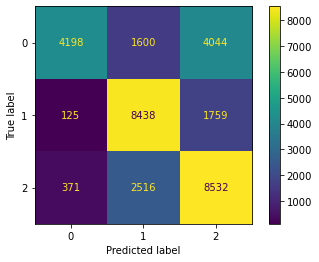

In [84]:
conf_mat = confusion_matrix(label_test, predictions, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=pipeline.classes_)
display.plot();

In [85]:
data_train, label_train, data_test, label_test = get_tokens_ngram(ngram=3)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 126329,
Samples in data_test: 31583,
Samples in label_train: 126329,
Samples in label_test: 31583
              precision    recall  f1-score   support

           0       0.69      0.35      0.46      9842
           1       0.67      0.69      0.68     10322
           2       0.49      0.69      0.57     11419

    accuracy                           0.58     31583
   macro avg       0.62      0.58      0.57     31583
weighted avg       0.61      0.58      0.57     31583



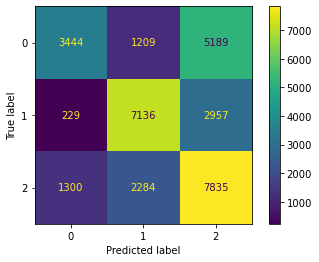

In [86]:
conf_mat = confusion_matrix(label_test, predictions, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=pipeline.classes_)
display.plot();

In [87]:
data_train, label_train, data_test, label_test = get_tokens_ngram(ngram=4)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 126329,
Samples in data_test: 31583,
Samples in label_train: 126329,
Samples in label_test: 31583
              precision    recall  f1-score   support

           0       0.55      0.24      0.33      9842
           1       0.68      0.50      0.58     10322
           2       0.40      0.70      0.51     11419

    accuracy                           0.49     31583
   macro avg       0.55      0.48      0.47     31583
weighted avg       0.54      0.49      0.48     31583



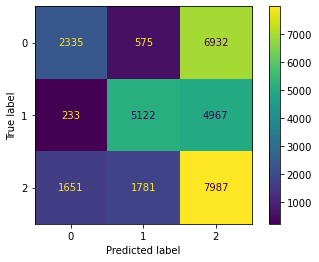

In [88]:
conf_mat = confusion_matrix(label_test, predictions, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=pipeline.classes_)
display.plot();

In [89]:
data_train, label_train, data_test, label_test = get_tokens_every_gram(min_length=1, max_length=3)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 126329,
Samples in data_test: 31583,
Samples in label_train: 126329,
Samples in label_test: 31583
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      9842
           1       0.73      0.81      0.77     10322
           2       0.63      0.78      0.70     11419

    accuracy                           0.72     31583
   macro avg       0.76      0.71      0.72     31583
weighted avg       0.75      0.72      0.72     31583



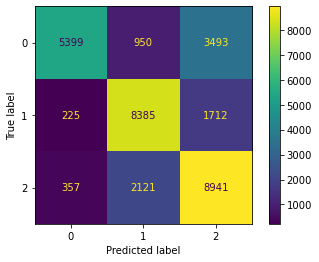

In [90]:
conf_mat = confusion_matrix(label_test, predictions, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=pipeline.classes_)
display.plot();